# Rozkłady dyskretne
1. Rozkład dwupunktowy
2. Rozkład dwumianowy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

### Zadanie
Dla rozkładu dwupunktowego i dwumianowego:
1. Zdefiniuj zmienną losową dla tego rozkładu prawdopobieństtwa.
2. Narysuj funkcję rozkładu prawdopodobieństwa.
3. Narysuj dystrybuantę.
4. Wyznacz podstawowe charakterystyki rozkładu: średnia, wariancja, odchylenie standardowe.
5. Wylosuj $n$ obserwacji z zdefiniowanego rozkładu.
6. Narysujmy histogram dla wylosowanej powyżej próbki.
7. Porównaj teoretyczną i zaaobserwowaną funkcję rozkładu prawdopobieństwa.

### Rozkład dwupunktowy - $Bern(p)$

Zmienna losowa $X$ ma **rozkład dwupunktowy** z parametrem $0 < p < 1$, jeżeli
$$
    P(X=1)=p, \quad P(X=0)=1-p.
$$

Zmienna losowa $X$ opisuje pojedyncze doświadczenie, o którym można myśleć w kategorii ,,sukces--porażka'': 
- zmienna przyjmuje wartość 1 z prawdopodobieństwem $p$, jeżeli w danym doświadczeniu zaistniał **,,sukces''**, oraz
- zmienna przyjmuje wartość 0 z prawdopodobieństwem $1-p$, jeżeli w doświadczeniu zainstniała **,,porażka''**.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bernoulli.html

#### Wybrane metody

`rvs(p, loc=0, size=1)` 	Random variates.

`pmf(x, p, loc=0)` 	Probability mass function.

`cdf(x, p, loc=0)` 	Cumulative density function.

`sf(x, p, loc=0)` 	Survival function (1-cdf — sometimes more accurate).

`ppf(q, p, loc=0)` 	Percent point function (inverse of cdf — percentiles).

`stats(p, loc=0, moments=’mv’)` 	Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).

`median(p, loc=0)` 	Median of the distribution.

`mean(p, loc=0)` 	Mean of the distribution.

`var(p, loc=0)` 	Variance of the distribution.

`std(p, loc=0)` 	Standard deviation of the distribution.

In [2]:
# 1. Definiujemy zmienna losową
p = 0.5 # prawdopodobieństwo sukcesu

bern = stats.bernoulli(p=p)
bern

In [19]:
# 2. Funkcja rozkładu prawdopodobieństwa (dla przypadku dyskretnego) = pmf = probability mass function

# bernoulli.pmf(k) = p    if k = 1 
#                  = 1-p  if k = 0

print(bern.pmf(0))
print(bern.pmf(1))
print(bern.pmf(0.5))

0.5
0.5
0.0


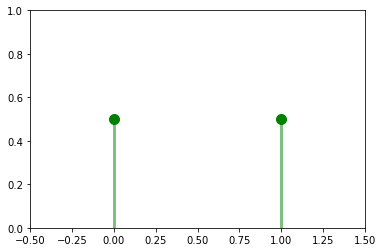

In [4]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim([-.5, 1.5])
ax.set_ylim([0, 1])

x_value = [0, 1]
ax.plot(x_value, bern.pmf(x_value), 'go', ms=10, label='theoretical bernoulli pmf')
# x : scalar or 1D array_like
# x-indexes where to plot the lines.
# ymin, ymax : scalar or 1D array_like
ax.vlines(x_value, 0, bern.pmf(x_value), colors='g', lw=3, alpha=0.5)

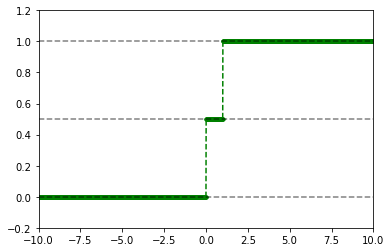

In [5]:
# 3. cdf = Cumulative density function = dystrybuanta
fig, ax = plt.subplots(1, 1)

ax.set_xlim([-10, 10])
ax.set_ylim([-0.2, 1.2])

x = np.arange(-10, 10, 0.01)
ax.plot(x, bern.cdf(x), 'go--', ms=3, label='bernoulli cdf')
ax.axhline(xmin=-5, xmax=5, y=0, color='black', alpha=0.5, linestyle='--')
ax.axhline(xmin=-5, xmax=5, y=0.5, color='black', alpha=0.5, linestyle='--')
ax.axhline(xmin=-5, xmax=5, y=1, color='black', alpha=0.5, linestyle='--')
plt.show()

In [6]:
# 4.  Charakterystyki rozkładu
# Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).
bern.stats('mvsk')

(array(0.5), array(0.25), array(0.), array(-2.))

In [7]:
# 5. możemy wylosować n(=100) wartości z tego rozkładu
bern.rvs(size=100)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

(array([57.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 43.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

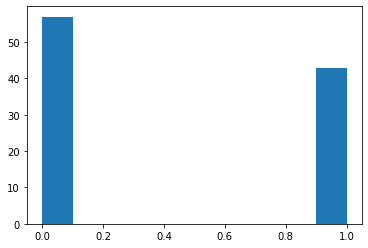

In [8]:
# 6. narysujmy histogram dla wylosowanej $n$-elementowej próbki
x = bern.rvs(size=100)
plt.hist(x)

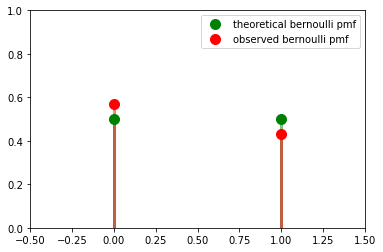

In [9]:
# 7. porównanie teoretycznej i zaobserwowanej funkcji rozkładu prawdopodobieństwa
fig, ax = plt.subplots(1, 1)
ax.set_xlim([-.5, 1.5])
ax.set_ylim([0, 1])

x_value = np.array([0, 1])
unique, counts = np.unique(x, return_counts=True)
y_obs = np.array(counts/x.size)

ax.plot(x_value, bern.pmf(x_value), 'go', ms=10, label='theoretical bernoulli pmf')
ax.vlines(x_value, 0, bern.pmf(x_value), colors='g', lw=3, alpha=0.5)

ax.plot(x_value, y_obs, 'ro', ms=10, label='observed bernoulli pmf')
ax.vlines(x_value, 0, y_obs, colors='r', lw=3, alpha=0.5)

plt.legend()
plt.show()

### Rozkład dwumianowy - $Bin(n, p)$
Zmienna losowa $X$ ma **rozkład dwumianowy** z parametrami $0<p<1$ oraz $n\in\mathbb{N}$, jeżeli
$$
    P(X=k)=\binom{n}{k}p^k(1-p)^{n-k} \quad \text{dla} \quad k=0,1,\ldots,n.
$$

Zmienna losowa $X$ przyjmuje wartości równe liczbie ,,sukcesów'' w~$n$~niezależnych doświadczeniach z prawdopodobieństwem sukcesu $p$ w każdym z~nich. 

W szczególności zmienną $X$ możemy przedstawić jako $$X=S_n=\sum_{i=1}^n X_i,$$ gdzie $X_i \sim \text{Bern}(p)$ oraz $(X_i)_{i=1}^n$ są wzajemnie niezależne.


https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html

In [10]:
# 1. Definicja
n, p = 6, 0.5
binom = stats.binom(n=n, p=p)

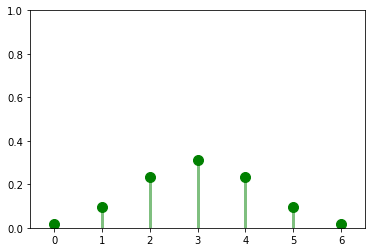

In [11]:
# Funkcja rozkładu prawdopodbieństwa
fig, ax = plt.subplots(1, 1)
ax.set_xlim([-.5, 6.5])
ax.set_ylim([0, 1])

x_value = np.arange(0, 7)
ax.plot(x_value, binom.pmf(x_value), 'go', ms=10, label='theoretical bernoulli pmf')
ax.vlines(x_value, 0, binom.pmf(x_value), colors='g', lw=3, alpha=0.5)

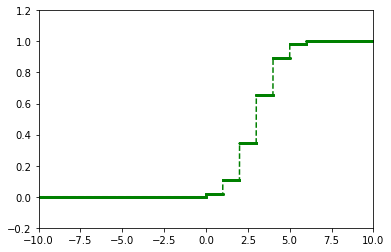

In [12]:
# 3. Dystrybuanta
fig, ax = plt.subplots(1, 1)

ax.set_xlim([-10, 10])
ax.set_ylim([-0.2, 1.2])

x = np.arange(-10, 10, 0.001)
ax.plot(x, binom.cdf(x), 'go--', ms=1, label='bernoulli cdf')
plt.show()

In [13]:
# 4. Charakterystyki rozkładu
binom.stats('mv')

(array(3.), array(1.5))

In [14]:
# 5. Próbka z rozkładu dwumianowego
x = binom.rvs(size=100)
np.unique(x)

array([0, 1, 2, 3, 4, 5, 6])

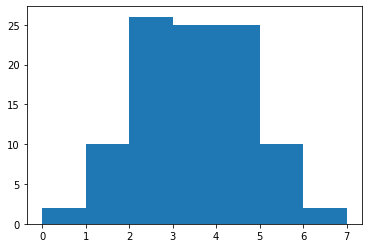

In [15]:
# 6. Histogram
plt.hist(x, bins=[0, 1, 2, 3, 4, 5, 6, 7]) 
# then the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). The last bin, however, is [3, 4], which includes 4.
plt.show()

### Zadania - dodatkowe

1. Oblicz prawdopodobieństwo $P(X=5)$, pod warunkiem, że zmienna losowa X ma rozkład dwumianowy z parametrami $n=10$ i $p=0.7$?

**Wskazówka**: $$P(X=x_0)=F(x_0)-F(x_0^-),$$gdzie $F(x_0^-)$ oznacza granicę lewostronną dystrybuanty $F$ w punkcie $x_0$.

In [20]:
# 1.
binom10_07 = stats.binom(n=10, p=.7)

# P(X=k) = CDF(k) - CDF(k-)
binom10_07.cdf(5) - binom10_07.cdf(5-10e-16)

0.10291934520000004

In [21]:
binom10_07.pmf(5)

0.10291934520000011

2. Oblicz prawdopodobieństwo tego, że rzucając cztery razy kostką wyrzucimy trzy razy ,,trójkę''.

**Analiza**:

$X_i$ - zdarzenie, że w $i$-tym rzucie wyrzucimy ,,trójkę''

$P(X_i=1)=\frac{1}{6}$ - prawdopodobieństwo wyrzucenia ,,trójki'' (,,sukces'')

$P(X_i=0)=\frac{5}{6}$ - prawdopodbieństwo wyrzucenia innej liczby oczek, różnej od trzech (,,porażka'')

$S_4=X_1+X_2+X_3+X_4$ - zdarzenie opisujące liczbę wyrzuconych ,,trójek'' w czterech rzutach

$S_4\sim \text{Bin}(n=4, p=\frac{1}{6})$ 

Jakie jest prawdopodbieństwo $P(S_4=3)$?

In [22]:
binom4_1_6 = stats.binom(n=4, p=1/6)

# P(X=3)
binom4_1_6.cdf(3) -  binom4_1_6.cdf(3-10e-16)

0.015432098765432167

In [23]:
binom4_1_6.pmf(3)

0.015432098765432093

3. Szacuje się, że aż 70% Polaków posiada kartę kredytową. Jakie jest prawdopodobieństwo, że w losowej grupie 10 osób więcej niż cztery osóby będą posiadały karty kredytowej?

**Wskazówka**: $P(X>k)=1-P(X\leq k) = 1- F(k)$.

$X_i$ - zdarzenie, że $i$-ty Polak posiada kartę kredytową;

$P(X_i=1)=0.7$ - prawdopodobieństwo, że $i$-ty Polak posiada kartę kredytową;

$P(X_i=0)=0.3$ - prawdopodobieństwo, że $i$-ty Polak nie posiada karty kredytowej;

$S_{10} = X_1 + \ldots + X_{10}$ - zdarzenie opisujące liczbę Polaków, którzy posiadają kartę kredytową w grupie losowo wybranych 10 Polaków;

$S_{10} \sim \text{Bin}(n=10, p=0.7)$

In [18]:
# P(X > 4) = 1 - P(X <= 4) = 1 - F(4)

binom10_07 = stats.binom(n=10, p=0.7)

1 - binom10_07.cdf(4)

0.9526510126